# 🔹What is Linear Regression (in depth)?

Linear Regression is a **supervised learning** algorithm used when:

-The target/output is numeric (e.g., price, salary, marks)

-We want to find the relationship between input feature(s) and the target

In simple terms:

It draws a straight line that best fits the data — so we can predict outcomes for unseen data.

# 🧠 How Does Linear Regression Work (Mathematically)?

The model tries to fit **a line**:

   y = 𝑚⋅𝑥+𝑐

Where:

x = input feature(s)

y = target/output

m = slope (weight)

c = intercept (bias)

The model learns the best values for m and c by minimizing error using a method called Least Squares.

# 📌 Let's Now Do It Practically

We’ll work with multiple features this time (not just house size).

# 📁 Dataset: House Prices with More Features
                                             
We’ll create a synthetic dataset with 3 features:

House Size (sqft)

No. of Bedrooms

Age of the house

And the target variable:

House Price (in ₹)

**🔹 Step 1: Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# import numpy as np → NumPy is used to work with arrays and perform numerical operations efficiently.
# import pandas as pd → Pandas is used for working with datasets (like loading, analyzing, transforming).
# import matplotlib.pyplot as plt → This is for plotting graphs and visualizing the results (like Actual vs Predicted).
# from sklearn.linear_model import LinearRegression → We import the Linear Regression algorithm from scikit-learn.
# from sklearn.model_selection import train_test_split → This lets us split our dataset into training and testing parts.
# from sklearn.metrics import mean_squared_error, r2_score → These are performance metrics to measure how well our model is doing.

**🔹 Step 2: Create a Simple Dataset (Multivariate)**

In [3]:
# 10 samples of 3 features: [Size, Bedrooms, Age]
# Features: Size (sqft), Bedrooms, Age of house (years)
x = np.array([
    [1400, 3, 10],
    [1600, 3, 5],
    [1700, 4, 20],
    [1875, 4, 15],
    [1100, 2, 30],
    [1550, 3, 8],
    [2350, 5, 5],
    [2450, 5, 3],
    [1425, 3, 18],
    [1700, 4, 12]
])

# Target variable: House Prices (in thousands)
y = np.array([2450, 3120, 2790, 3080, 1990, 2900, 4000, 4500, 2650, 3000])

# What each part means:
# X is a multivariate feature matrix — each row is a house, and each column is a feature:
# -Column 1 = Size in square feet
# -Column 2 = Number of bedrooms
# -Column 3 = Age of the house (in years)
# y is the target array — it contains the actual prices of the houses, which the model will learn to predict.

**🔹 Step 3: Split the Dataset into Training and Testing**

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# train_test_split(...) → This function splits your dataset into two parts:
#-A training set → Used to train the model
#-A test set → Used to evaluate the model’s performance
# x_train, x_test → These are your input features split into:
#-x_train: data the model will learn from (80%)
#-x_test: data the model will be tested on (20%)
# y_train, y_test → These are your target labels split the same way
# test_size=0.2 → 20% of the data will go into testing, 80% into training
# random_state=1 → This just ensures the split is reproducible (any number is fine)

**🔹 Step 4: Train the Linear Regression Model**

In [5]:
model = LinearRegression()
model.fit(x_train, y_train)

# model = LinearRegression()
# This creates an empty Linear Regression model from scikit-learn.
# It’s like creating an “empty brain” that’s ready to learn patterns from the data.
# model.fit(X_train, y_train)
# This is the training step — the model "studies" the training data:
#-X_train: your input features (size, bedrooms, age)
#-y_train: your actual house prices
# Behind the scenes, the model calculates the best-fitting line (or hyperplane) that minimizes the prediction error.

LinearRegression()

**🔹Step 5: View Learned Coefficients**

In [6]:
print("Intercept (c):", model.intercept_)
print("Coefficients (m):", model.coef_)

# When your model learns from data (in model.fit()), it fits a linear equation:
# Price=𝑚1×Size+𝑚2×Bedrooms+𝑚3×Age+𝑐
# model.intercept_ gives you the constant c, called the intercept —
# This is like the base price when all feature values are 0.
# model.coef_ gives you the slopes (m1, m2, m3) —
# These are the weights or coefficients for each feature:
# -m1 → how much price increases per square foot
# -m2 → how much price increases per bedroom
# -m3 → how much price increases (or decreases) per year of age

Intercept (c): 331.53446269377673
Coefficients (m): [   3.04507927 -673.56784214  -10.34272393]


**🔹Step 6: Predict and Evaluate**

In [8]:
y_pred = model.predict(x_test)
# This line uses the trained model to predict prices for the x_test data (your unseen 20% test data).
# → Output: y_pred contains the predicted house prices for that x_test data.

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# mean_squared_error() → Calculates how far off the predictions are from the actual prices. in simple words, it calculates the error.
# -It squares the differences to penalize big errors.
# -Lower MSE = better predictions.
# r2_score() → Tells us how well the model explains the variation in price.
# -R² = 1 means perfect prediction.
# -R² = 0 means no better than just guessing the average.
# -R² < 0 means worse than guessing.

print("Mean Squared Error", mse)
print("R-Squared Error", r2)
# MSE → Error measure (lower is better)
# R² Score → Accuracy measure (closer to 1 is better)

Mean Squared Error 64853.18714604781
R-Squared Error -4.8823752513422045


**🔍 Let’s interpret model’s performance:**

1️⃣ Mean Squared Error (MSE):

Mean Squared Error: 64853.18

This means the average of the squared errors between actual and predicted prices is ₹64,853².

Since MSE is in squared units, it's harder to interpret directly, but lower MSE is always better.

For such a small dataset, this is quite large — it tells us the model’s predictions were not very accurate.

2️⃣ R-squared Score (R²):

R² Score: -4.88

Uh-oh! 😬 A negative R² means the model is doing worse than just predicting the average house price for all houses.

R² = 1 is perfect.

R² = 0 means no better than the average.

R² < 0 means model is making predictions worse than guessing.

🔴 This suggests the model didn’t generalize well — probably because of:

Very small dataset (only 10 data points)

Not enough variation in features

Possibly overfitting the training set 

Let's not worry about bad performance here — the goal is learning the full process! In real projects, you’ll use more data and better preprocessing.

**🔹Step 7: Visualize Actual vs Predicted**

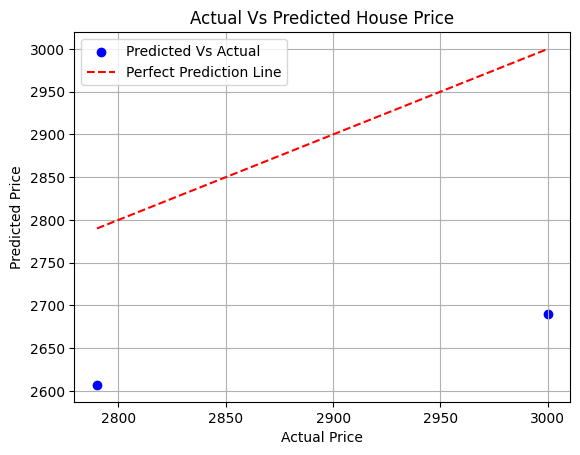

In [13]:
plt.scatter(y_test, y_pred, color="blue", label="Predicted Vs Actual")
# This plots the actual prices (y_test) on the x-axis vs. predicted prices (y_pred) on the y-axis.
# Each dot shows one house.
# If the prediction is perfect, the dot will lie on the diagonal line (coming next).
# Color 'blue' is used for dots, and we give it a label for the legend.

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction Line")
# This draws a diagonal red dashed line from the minimum to maximum actual price.
# It represents “perfect predictions”, where predicted = actual.
# If your model is good, all your blue dots will lie close to this red line.

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted House Price")

plt.legend()
plt.grid(True)
plt.show()
# plt.legend() → shows labels like "Predicted vs Actual" and "Perfect Prediction Line"
# plt.grid(True) → adds gridlines for better visual reference
# plt.show() → displays the final plot

# What this plot shows:
# If predictions were perfect, all points (blue dots) would lie exactly on the red line.
# If points are far from the red line → predictions were not accurate.
# You can visually see how well the model did.

**✅ What this chart shows:**

Blue dots → These are model’s predictions (Predicted vs Actual).

Red dashed line → This represents a perfect model, where Predicted = Actual.

**🔍 Observations:**
                                                                  
Blue dots are not very close to the red line.

This means the model’s predictions are not very accurate.

This matches our previous result:

MSE was high.

R² score was very negative (-4.88), meaning the model performs worse than simply guessing the average price.

**💡 Why this happened:**
                                                                  
We used only 10 rows of data for a 3-feature multivariate regression.

That’s a very small dataset for a model to learn patterns.

Small datasets often result in overfitting or poor generalization.

**🧠 Conclusion:**
                           
✅ We’ve learned how to:

-Train a linear regression model

-Split data into train/test

-Predict and evaluate

-Visualize actual vs predicted results

🔁 In real projects, we’ll work with larger datasets, do feature scaling, handle outliers, and improve model performance.


**🔹 Step 8: Predict Price for a New House**

In [18]:
# Create a new house with features: [Size (sq ft), Bedrooms, Age (years)]
new_house = np.array([[2000,4,10]])

# Predict the price using the trained model
predicted_price = model.predict(new_house)

# Display the result
print(f"Predicted Price: Rs{predicted_price[0]*1000:.2f}")

# new_house = np.array([[2000, 4, 10]])
# You create a 2D array because the model expects data in (n_samples, n_features) format.
# Here, the new house has:
# -2000 sq ft area
# -4 bedrooms
# -10 years old
# model.predict(new_house)
# This line gives you the predicted price based on the model’s learned coefficients.
# print(...)->It prints the result in Indian Rupees (in thousands), formatted to 2 decimal places.

Predicted Price: Rs3623994.39
